## 🤖 Ders 3 Uygulaması: Veri Avcılığı ve K-Means ile Segmentasyon Analizi

Bu interaktif projede, 3. ders notlarımızda yer alan **Web Kazıma (Web Scraping)**  ve Gözetimsiz Öğrenmenin yıldızı **K-Means Kümeleme** konularını uçtan uca tek bir gerçek hayat senaryosunda birleştiriyoruz.

Senaryomuzda, karmaşık HTML kodları içinden e-ticaret bilgisayar verilerini (Fiyat ve Performans) çekiyor, veriyi devasa bir boyuta genişletiyor ve makine öğrenmesi algoritmamızın bu bilgisayarları otomatik olarak "Segmentlerine" ayırmasını izliyoruz.

### 🌟 Bu Uygulamada Neler Var?

* **Web Kazıma (Parsing):** `BeautifulSoup` kütüphanesi kullanılarak, tıpkı bir tarayıcının yaptığı gibi karmaşık HTML etiketleri (`<div>`, `<span>`) arasından hedef veriler süzülür ve anlamlı bir tabloya dönüştürülür.
* **Dirsek (Elbow) Metodu:** K-Means algoritmasına veriyi kaç gruba ayırması gerektiğini söylemek için maliyet fonksiyonu (J) hesaplanır ve grafikteki "dirsek" kırılımı (K=3) tespit edilir.
* **Gözetimsiz Öğrenme (Unsupervised Learning):** Etiketleri (hangi ürünün hangi sınıfa ait olduğu) bilinmeyen 3000 adetlik veri, algoritma tarafından birbirlerine olan mesafelerine göre otomatik olarak kümelenir.
* **Merkez Noktalarının (Centroids) Keşfi:** Algoritmanın iteratif denemeler sonucu bulduğu geometrik ağırlık merkezleri haritada kırmızı yıldızlarla gösterilir.
* **Fiziksel Anlamlandırma (İnsan Yorumu):** Algoritma sadece verileri gruplar, bu grupların ne anlama geldiğini bilmez. Çıkan sonuçlara bakarak "Giriş Seviyesi", "Fiyat/Performans" ve "Premium/Oyun" isimlendirmeleri insan mantığıyla koda eklenir.

Not : Hiçbir siteyi yormamak adına sentetik verilerle işlemlerimizi yürütüyoruz. Etik kurallara uymak değerli.

### 🚀 Nasıl Kullanılır?

1. Bilgisayarınızda gerekli kütüphanelerin kurulu olduğundan emin olun:
   `pip install pandas numpy matplotlib seaborn bs4 scikit-learn`
2. İlgili Python dosyasını (`.ipynb`) çalıştırın.
3. Önce **Dirsek Grafiği** açılacak. Maliyetin nerede kırıldığını (K=3) inceleyin ve grafiği kapatın.
4. Ardından 3000 ürünün K-Means tarafından nasıl kusursuzca 3 farklı segmente ayrıldığını gösteren **Kümeleme Grafiği** karşınıza çıkacaktır!

--- PROJE 2: KEPÇEYLE VERİ ÇEKİP K-MEANS İLE KÜMELEME ---

1. HTML kaynak kodu elimize ulaştı. Şimdi içinden verileri cımbızla çekelim...
2. Çöpler temizlendi, 3000 satırlık dev veri setimiz hazır!



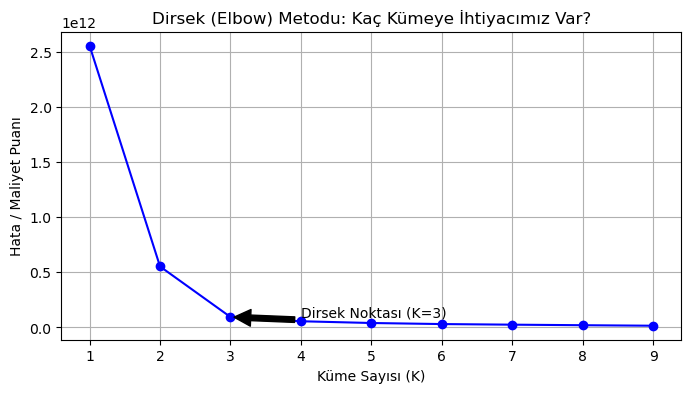

Grafiğe baktığımızda kırılmanın K=3'te olduğunu görüyoruz.
Makine diyor ki: 'Dostum, bu verileri 3'e ayırmak en temizi.' Biz de uyuyoruz.



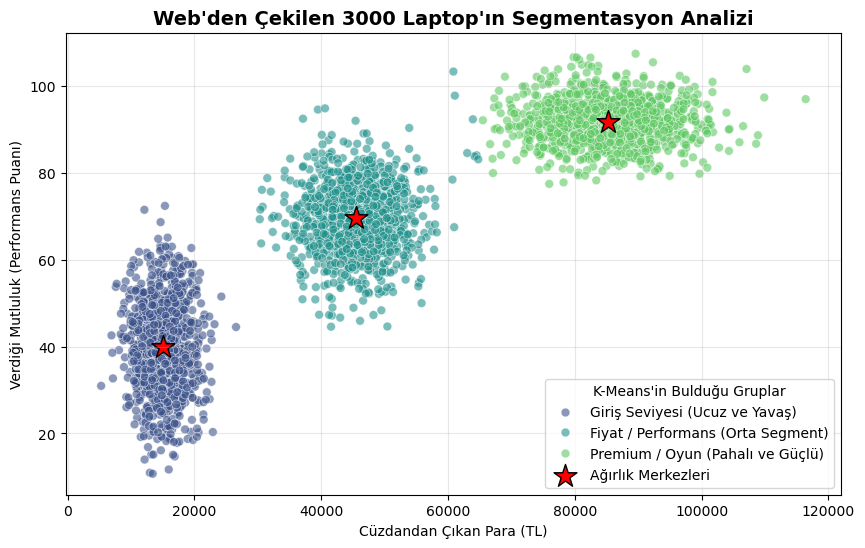

--- VE MUTLU SON ---
Gözetimsiz öğrenme, koskoca bir veri yığınının içindeki düzeni buldu ve işimizi halletti!


In [3]:
import os
import warnings

# Windows ve Scikit-Learn bazen hafıza yönetimi konusunda kavga edebiliyor. 
# Terminalimizde o meşhur kırmızı uyarılar çıkıp canımızı sıkmasın diye aralarını buluyoruz :)
os.environ["OMP_NUM_THREADS"] = "2" 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

print("--- PROJE 2: KEPÇEYLE VERİ ÇEKİP K-MEANS İLE KÜMELEME ---")

# ==========================================
# 1. AŞAMA: WEB KAZIMA (WEB SCRAPING) - VERİ AVCILIĞI
# ==========================================
# Ders 3'te gördüğümüz gibi, web sitelerindeki veriler aslında insanlar okusun diye 
# süslenmiş HTML kodlarıdır. Gerçek siteler botları pek sevmez, bu yüzden şimdilik 
# kendi mini-HTML çorbamızı yaratıp onun içinden veri çekeceğiz.
html_verisi = """
<div class="product"><span class="price">15000 TL</span><span class="score">45 Puan</span></div>
<div class="product"><span class="price">85000 TL</span><span class="score">95 Puan</span></div>
<div class="product"><span class="price">45000 TL</span><span class="score">70 Puan</span></div>
<div class="product"><span class="price">12000 TL</span><span class="score">35 Puan</span></div>
<div class="product"><span class="price">92000 TL</span><span class="score">98 Puan</span></div>
<div class="product"><span class="price">48000 TL</span><span class="score">75 Puan</span></div>
"""

print("\n1. HTML kaynak kodu elimize ulaştı. Şimdi içinden verileri cımbızla çekelim...")

# BeautifulSoup amca sağ olsun, o karmaşık HTML metnini bizim için ağaç yapısına çeviriyor.
soup = BeautifulSoup(html_verisi, 'html.parser')

fiyatlar = []
puanlar = []

# Sitedeki tüm "product" divlerini geziyor ve içindeki yazıları temizliyoruz.
# "15000 TL" yazısındaki " TL" kısmını çöpe atıp geriye kalan saf sayıyı almamız lazım, 
# yoksa makine öğrenmesi modelleri metin görünce kafası karışır.
for urun in soup.find_all('div', class_='product'):
    fiyat_text = urun.find('span', class_='price').text.replace(' TL', '')
    fiyatlar.append(int(fiyat_text))
    
    puan_text = urun.find('span', class_='score').text.replace(' Puan', '')
    puanlar.append(int(puan_text))

# Elimde sadece 6 tane bilgisayar var. Bu kadarcık veriyle koca modeli yoramayız :)
# NumPy'nin istatistiksel gücünü (normal dağılım) kullanarak bu 6 örneği baz alıp 
# sanki siteden 3000 tane ürün çekmişiz gibi devasa bir sentetik veri seti yaratıyorum.
np.random.seed(42)
genis_fiyatlar = np.concatenate([
    np.random.normal(15000, 3000, 1000),  # 1000 adet ucuz bilgisayar
    np.random.normal(45000, 5000, 1000),  # 1000 adet orta halli bilgisayar
    np.random.normal(85000, 8000, 1000)   # 1000 adet canavar gibi bilgisayar
])
genis_puanlar = np.concatenate([
    np.random.normal(40, 10, 1000),       
    np.random.normal(70, 8, 1000),        
    np.random.normal(92, 5, 1000)         
])

# Dağınık dizileri derleyip toplayıp güzel bir tabloya (DataFrame) oturtalım.
df = pd.DataFrame({'Fiyat': genis_fiyatlar, 'Performans': genis_puanlar})
print(f"2. Çöpler temizlendi, {len(df)} satırlık dev veri setimiz hazır!\n")


# ==========================================
# 2. AŞAMA: K DEĞERİNİ BULMA (DİRSEK METODU)
# ==========================================
# K-Means algoritması çok zekidir ama ona "bu verileri kaç gruba ayırayım?" diye 
# baştan kopya vermemiz gerekir. Biz de 1'den 10'a kadar farklı grup sayılarını denetip, 
# hatanın nerede en mantıklı seviyeye düştüğünü bulmasını istiyoruz (Dirsek Metodu).
maliyetler = []
K_araligi = range(1, 10)

for k in K_araligi:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(df)
    maliyetler.append(kmeans_test.inertia_)

# Bakalım dirsek nerede kırılıyor?
plt.figure(figsize=(8, 4))
plt.plot(K_araligi, maliyetler, 'bo-')
plt.title('Dirsek (Elbow) Metodu: Kaç Kümeye İhtiyacımız Var?')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('Hata / Maliyet Puanı')
plt.grid(True)
plt.annotate('Dirsek Noktası (K=3)', xy=(3, maliyetler[2]), xytext=(4, maliyetler[2] + 1000000000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

print("Grafiğe baktığımızda kırılmanın K=3'te olduğunu görüyoruz.")
print("Makine diyor ki: 'Dostum, bu verileri 3'e ayırmak en temizi.' Biz de uyuyoruz.\n")


# ==========================================
# 3. AŞAMA: GÖZETİMSİZ ÖĞRENMENİN BÜYÜSÜ (K-MEANS)
# ==========================================
# Şimdi dananın kuyruğunun koptuğu yer. Verilerde ETIKET YOK. Hangi bilgisayar oyuncu bilgisayarı, 
# hangisi ofis bilgisayarı makine bunu bilmiyor. Sadece fiyat ve puan arasındaki 
# matematiksel mesafelere bakarak ürünleri birbirine benzetmeye çalışacak.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Veriyi ver, kümeleri bul ve her satıra bir Segment_Kodu (0, 1, 2) yapıştır.
df['Segment_Kodu'] = kmeans.fit_predict(df) 

# Algoritmanın haritada merkez (centroid) olarak belirlediği 3 ana nokta.
merkezler = kmeans.cluster_centers_

# Makine grubu ayırdı (Örn: 0. Grup) ama bunun ne anlama geldiğini o bilemez.
# Gözetimsiz öğrenmede son sözü İNSAN söyler. En pahalı gruba "Premium", 
# en ucuza "Giriş Seviyesi" diyerek makinenin bulduğu sayıları Türkçeye çeviriyoruz.
def segment_isim_ver(kod):
    if kod == df[df['Fiyat'] == df['Fiyat'].max()]['Segment_Kodu'].values[0]:
        return "Premium / Oyun (Pahalı ve Güçlü)"
    elif kod == df[df['Fiyat'] == df['Fiyat'].min()]['Segment_Kodu'].values[0]:
        return "Giriş Seviyesi (Ucuz ve Yavaş)"
    else:
        return "Fiyat / Performans (Orta Segment)"

# İsimleri tablomuza uygulayalım.
df['Segment_Adi'] = df['Segment_Kodu'].apply(segment_isim_ver)

# ==========================================
# 4. AŞAMA: SONUÇLARI GÖRSELLEŞTİRME
# ==========================================
# Hadi şu 3000 ürünü Fiyat ve Performans ekseninde tabloya dökelim.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fiyat', y='Performans', hue='Segment_Adi', palette='viridis', s=40, alpha=0.6)

# Merkez noktalarımızı kocaman kırmızı yıldızlarla gösterelim ki belli olsun
plt.scatter(merkezler[:, 0], merkezler[:, 1], c='red', s=300, marker='*', label='Ağırlık Merkezleri', edgecolor='black')

plt.title("Web'den Çekilen 3000 Laptop'ın Segmentasyon Analizi", fontsize=14, fontweight='bold')
plt.xlabel("Cüzdandan Çıkan Para (TL)")
plt.ylabel("Verdiği Mutluluk (Performans Puanı)")
plt.legend(title="K-Means'in Bulduğu Gruplar")
plt.grid(True, alpha=0.3)
plt.show()

print("--- VE MUTLU SON ---")
print("Gözetimsiz öğrenme, koskoca bir veri yığınının içindeki düzeni buldu ve işimizi halletti!")